In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

from utils import load_features_and_labels
from models.gaussian_process import train_gp_model
from lib import generate_smiles

from rdkit.Chem import MolFromSmiles
from rdkit import Chem
from rdkit.Chem import Draw
from mordred import Calculator, descriptors, error

D:\Anaconda3\envs\molbert\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
D:\Anaconda3\envs\molbert\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

### Generating a library of photoswitches

In [4]:
parent_mols = [
  '[U](C1=CC=C(C=C1)N=NC2=CC=C([U])C=C2)', # azobenzene
  'C2(=CC=C([U])[N]2)N=NC3=CC=C([U])[N]3', # bisazopyrrole
  'C2(=CC=C([U])[S]2)N=NC3=CC=C([U])[S]3', # bisazothiophene
  'C2(=CC=C([U])[O]2)N=NC3=CC=C([U])[O]3', # bisazofuran
]

linkers = [
  '([H])',                                # H-terminus
  '(c2ccc([Y])cc2)',                      # benzene
  '(c2ncc([Y])cc2)',                      # pyridine
  '(c2ncc([Y])cn2)',                      # pyrimidine
  '(c2nnc([Y])nn2)',                      # tetrazine
  'C2=CC=C([Y])C2',                       # cyclopentadiene
  '(c2ccc([Y])N2)',                       # pyrrole (2,5) 
  '(c2cc([Y])cN2)',                       # pyrrole (2,4) 
  '(c2ccc([Y])N(C)2)',                    # pyrrole(N-methyl) 
  '(c2ccc([Y])N(C=O)2)',                  # pyrrole(N-COH)
  '(c1cnc([Y])N1)',                       # imidazole
  'c2ccc([Y])O2',                         # furan
  'c2ccc([Y])S2',                         # thiophene
  '(c2ccc([Y])S(=O)(=O)2)',               # thiophene(dioxide)
  '(c2sc([Y])cn2)',                       # thiazole (2,5)
  '(c2scc([Y])n2)',                       # thiazole (2,4)
  '(c1ncc([Y])o1)',                       # oxazole (2,5)
  '(c1nc([Y])co1)',                       # oxazole (2,4)
  '(C#C[Y])',                             # acetylene
  '/C=C/[Y]',                             # ethylene(trans)
  '(C=N[Y])'                              # imine
] 

terminals = [
  '([H])',                                # hydrogen
  '([OH])',                               # hydroxy 
  '[C](F)(F)F',                           # trifluoromethyl 
  '[O][C](F)(F)F',                        # trifluoromethoxy 
  '[C]',                                  # methyl
  '[O][C]',                               # methoxy 
  '[N+]([O-])=O',                         # nitro 
  '([SH])',                               # thiol 
  '[F]',                                  # fluoro 
  '[Cl]',                                 # chloro 
  'C#N'                                   # cyano 
]

generate_smiles('./raw_data/library_01.txt', parent_mols, linkers, terminals)

[*:1]([U])>>[*:1]([H])
[*:1]([U])>>[*:1](c2ccc([Y])cc2)
[*:1]([U])>>[*:1](c2ncc([Y])cc2)
[*:1]([U])>>[*:1](c2ncc([Y])cn2)
[*:1]([U])>>[*:1](c2nnc([Y])nn2)
[*:1]([U])>>[*:1]C2=CC=C([Y])C2
[*:1]([U])>>[*:1](c2ccc([Y])N2)
[*:1]([U])>>[*:1](c2cc([Y])cN2)
[*:1]([U])>>[*:1](c2ccc([Y])N(C)2)
[*:1]([U])>>[*:1](c2ccc([Y])N(C=O)2)
[*:1]([U])>>[*:1](c1cnc([Y])N1)
[*:1]([U])>>[*:1]c2ccc([Y])O2
[*:1]([U])>>[*:1]c2ccc([Y])S2
[*:1]([U])>>[*:1](c2ccc([Y])S(=O)(=O)2)
[*:1]([U])>>[*:1](c2sc([Y])cn2)
[*:1]([U])>>[*:1](c2scc([Y])n2)
[*:1]([U])>>[*:1](c1ncc([Y])o1)
[*:1]([U])>>[*:1](c1nc([Y])co1)
[*:1]([U])>>[*:1](C#C[Y])
[*:1]([U])>>[*:1]/C=C/[Y]
[*:1]([U])>>[*:1](C=N[Y])
[*:1]([U])>>[*:1]([H])
[*:1]([U])>>[*:1](c2ccc([Y])cc2)
[*:1]([U])>>[*:1](c2ncc([Y])cc2)
[*:1]([U])>>[*:1](c2ncc([Y])cn2)
[*:1]([U])>>[*:1](c2nnc([Y])nn2)
[*:1]([U])>>[*:1]C2=CC=C([Y])C2
[*:1]([U])>>[*:1](c2ccc([Y])N2)
[*:1]([U])>>[*:1](c2cc([Y])cN2)
[*:1]([U])>>[*:1](c2ccc([Y])N(C)2)
[*:1]([U])>>[*:1](c2ccc([Y])N(C=O)2)
[*:1]([U])>>[*:1

In [5]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/initial_dataset/mordred_descriptors.csv' ,'./raw_data/photoswitches.csv' ,'e_iso_pi')
model, x_scaler, y_scaler = train_gp_model(X, y)


Beginning training loop...
(313, 1427) (313, 1)
(313, 1427) (313, 1)
(313, 1427) (313, 1)
(313, 1427) (313, 1)
(313, 1427) (313, 1)
(313, 1427) (313, 1)
(313, 1427) (313, 1)
(313, 1427) (313, 1)
(313, 1427) (313, 1)
(313, 1427) (313, 1)

mean R^2: 0.9045 +- 0.0080
mean RMSE: 20.1811 +- 0.8257
mean MAE: 12.8562 +- 0.4907



In [14]:
smiles_list = []
with open('./raw_data/library_01.txt', 'r') as f:
  lines = f.readlines()
  for line in lines:
    smiles_list.append(line.rstrip())

rdkit_mols = [MolFromSmiles(smiles) for smiles in smiles_list]

calc = Calculator(descriptors)

mordred_descriptors = calc.pandas(rdkit_mols)

error_columns = []
for i, e in enumerate(mordred_descriptors.dtypes):
    if e=="object":
        error_columns += [i]
        
mordred_descriptors = mordred_descriptors.drop(mordred_descriptors.columns[error_columns], axis=1)
mordred_descriptors = mordred_descriptors.dropna(axis=1)
mordred_descriptors.insert(0, "SMILES", smiles_list)
mordred_descriptors.to_csv('./mordred_descriptors_library_01.csv')

100%|██████████| 872/872 [01:49<00:00,  7.94it/s]


In [15]:
df1 = pd.read_csv('./processed_data/initial_dataset/mordred_descriptors.csv')
original_columns = df1.columns[2:]

df2 = pd.read_csv('./mordred_descriptors_library_01.csv')
remove_columns = []
for column in df2.columns[2:]:
  if column not in original_columns:
    print(column)
    remove_columns.append(column)
    
df2 = df2.drop(labels=remove_columns, axis=1)

df2.to_csv('./mordred_descriptors_library_01.csv')

MAXaaCH
MINaaCH
MDEC-22
MDEC-23
Vabc


In [4]:
mordred_descriptors = pd.read_csv('mordred_descriptors_library_01.csv')

In [7]:
means = []
vars = []
scaled_vars = []

for idx, row in mordred_descriptors.iterrows():
  features = row.to_numpy()[3:].reshape(1, -1)
  features = x_scaler.transform(features)
  mean, var = model.predict_f(features)
  means.append(y_scaler.inverse_transform(mean)[0][0])
  vars.append(var[0][0].numpy())
  scaled_vars.append(y_scaler.inverse_transform(var)[0][0])
  
mordred_descriptors.insert(loc=0, column='mean', value=means)
mordred_descriptors.insert(loc=0, column='var', value=vars)

AttributeError: 'float' object has no attribute 'dtype'

In [58]:
mordred_descriptors = mordred_descriptors.drop(columns=['desired_wavelength_dist'])
desired_wavelength = 450
mordred_descriptors.insert(loc=0, column='desired_wavelength_dist', value=(mordred_descriptors['mean']-desired_wavelength).abs())

In [59]:
top_molecules = mordred_descriptors.sort_values(['desired_wavelength_dist', 'var'], ascending=[True, True]).head(10)
top_molecules

,desired_wavelength_dist,var,mean,Unnamed: 0,Unnamed: 0.1,SMILES,ABC,ABCGG,nAcid,nBase,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
243,0.134439,0.304277,450.134439,243,243,COc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(OC)n4C)[nH]3)[n...,21.896449,18.238429,0,0,...,10.185013,81.188746,378.180424,7.563608,2414,41,150.0,180.0,8.611111,6.250000
469,0.375237,0.332185,449.624763,469,469,COc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(OC)cn4)s3)s2)nc1,21.839430,16.112720,0,0,...,10.076726,78.668861,410.061966,9.763380,2540,39,146.0,170.0,7.388889,6.305556
605,0.386888,0.365937,449.613112,605,605,N#Cc1nnc(-c2ccc(N=Nc3ccc(-c4nnc(C#N)nn4)s3)s2)nn1,21.839430,16.112720,0,0,...,10.076726,78.668861,404.012330,12.625385,2540,39,146.0,170.0,7.388889,6.305556
443,0.389148,0.344787,449.610852,443,443,Oc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(O)cn4)s3)s2)nc1,20.643996,15.435095,0,0,...,10.021226,76.388269,382.030666,10.611963,2023,35,138.0,160.0,6.888889,5.638889
506,0.447570,0.295745,450.447570,506,506,O=[N+]([O-])c1ccc(-c2ccc(N=Nc3ccc(-c4ccc([N+](...,22.196109,17.821670,0,0,...,10.097532,80.851181,415.988526,11.555237,2496,37,150.0,176.0,8.611111,6.027778
72,0.499664,0.285938,449.500336,72,72,Fc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(F)s4)cc3)cc2)s1,20.643996,15.109884,0,0,...,10.022115,76.363858,384.031495,10.667542,2075,35,138.0,160.0,6.888889,5.638889
291,0.527157,0.356512,449.472843,291,291,N#Cc1ncc(-c2ccc(N=Nc3ccc(-c4cnc(C#N)[nH]4)[nH]...,20.425216,16.550548,0,0,...,9.979476,78.358059,342.108990,9.503028,2025,33,138.0,162.0,6.888889,5.805556
505,0.653759,0.358020,449.346241,505,505,Cn1c(S)ccc1-c1ccc(N=Nc2ccc(-c3ccc(S)n3C)s2)s1,20.701015,17.365380,0,0,...,10.128190,78.901563,416.025781,9.905376,1943,37,142.0,170.0,8.111111,5.583333
90,0.666972,0.289218,449.333028,90,90,N#Cc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(C#N)o4)cc3)cc2)o1,21.839430,15.829305,0,0,...,10.076726,78.668861,366.086524,9.633856,2592,39,146.0,170.0,7.388889,6.305556
4,0.691855,0.262491,450.691855,4,4,Cn1c(O)ccc1-c1ccc(N=Nc2ccc(-c3ccc(O)n3C)cc2)cc1,22.115229,16.650607,0,0,...,10.212552,79.345237,372.158626,7.753305,2502,43,150.0,178.0,8.611111,6.083333


In [60]:
for smiles in top_molecules['SMILES']:
  print(smiles)

COc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(OC)n4C)[nH]3)[nH]2)n1C
COc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(OC)cn4)s3)s2)nc1
N#Cc1nnc(-c2ccc(N=Nc3ccc(-c4nnc(C#N)nn4)s3)s2)nn1
Oc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(O)cn4)s3)s2)nc1
O=[N+]([O-])c1ccc(-c2ccc(N=Nc3ccc(-c4ccc([N+](=O)[O-])o4)s3)s2)o1
Fc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(F)s4)cc3)cc2)s1
N#Cc1ncc(-c2ccc(N=Nc3ccc(-c4cnc(C#N)[nH]4)[nH]3)[nH]2)[nH]1
Cn1c(S)ccc1-c1ccc(N=Nc2ccc(-c3ccc(S)n3C)s2)s1
N#Cc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(C#N)o4)cc3)cc2)o1
Cn1c(O)ccc1-c1ccc(N=Nc2ccc(-c3ccc(O)n3C)cc2)cc1


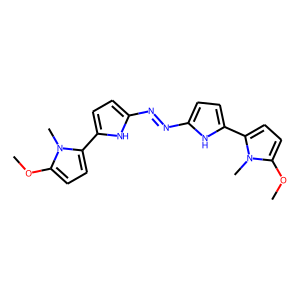

predicted wavelength:  450.13443865501324  , variance:  0.30427713729126893




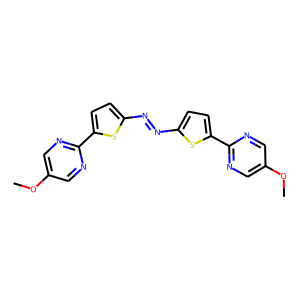

predicted wavelength:  449.6247630189172  , variance:  0.3321853024784701




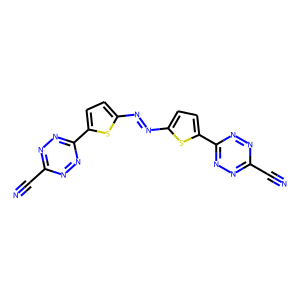

predicted wavelength:  449.61311158041156  , variance:  0.3659371905316849




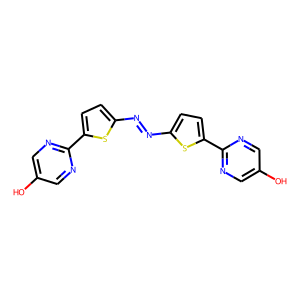

predicted wavelength:  449.6108524594586  , variance:  0.3447866028374412




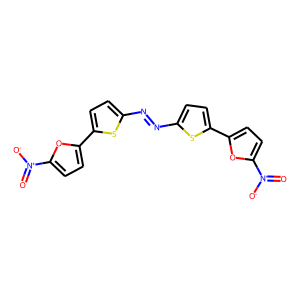

predicted wavelength:  450.4475700794066  , variance:  0.29574512714953116




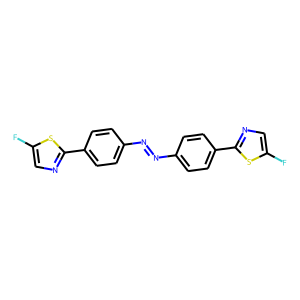

predicted wavelength:  449.5003356356907  , variance:  0.2859379040035258




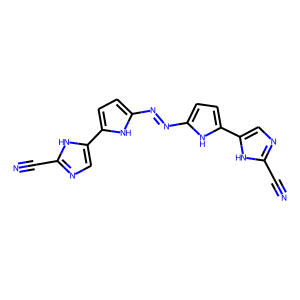

predicted wavelength:  449.47284259043084  , variance:  0.3565116897224747




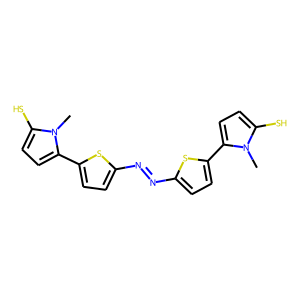

predicted wavelength:  449.3462411800078  , variance:  0.3580197304013704




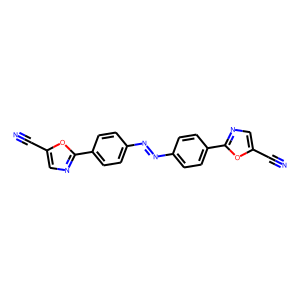

predicted wavelength:  449.3330275110255  , variance:  0.28921775554538576




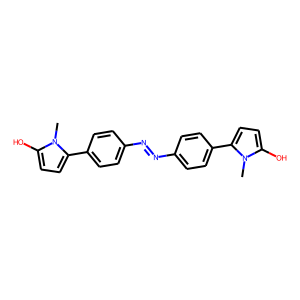

predicted wavelength:  450.6918545128566  , variance:  0.262491490194134




In [40]:
top_smiles = top_molecules['SMILES']
means = top_molecules['mean']
vars = top_molecules['var']

for (smiles, mean, var) in zip(top_smiles, means, vars):
  image = Draw.MolToImage(Chem.MolFromSmiles(smiles))
  display(image)
  print('predicted wavelength: ', mean, ' , variance: ', var)
  print('\n')

In [52]:
# mordred_descriptors = mordred_descriptors.drop(columns=['desired_wavelength_dist'])

desired_wavelength = 650
mordred_descriptors.insert(loc=0, column='desired_wavelength_dist', value=(mordred_descriptors['mean']-desired_wavelength).abs())

In [53]:
top_molecules = mordred_descriptors.sort_values(['desired_wavelength_dist', 'var'], ascending=[True, True]).head(10)
top_molecules

,desired_wavelength_dist,var,mean,Unnamed: 0,Unnamed: 0.1,SMILES,ABC,ABCGG,nAcid,nBase,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
444,144.612390,0.296652,505.387610,444,444,Cn1c(C#N)ccc1-c1ccc(N=Nc2ccc(-c3ccc(C#N)n3C)s2)s1,21.896449,18.238429,0,0,...,10.185013,81.188746,402.072136,9.573146,2414,41,150.0,180.0,8.611111,6.250000
570,155.643134,0.305664,494.356866,570,570,N#Cc1c[nH]c(-c2ccc(N=Nc3ccc(-c4cc(C#N)c[nH]4)s...,20.425216,16.550548,0,0,...,9.979476,78.358059,374.040836,10.390023,2025,33,138.0,162.0,6.888889,5.805556
512,157.836804,0.322307,492.163196,512,512,N#Cc1ncc(-c2ccc(N=Nc3ccc(-c4cnc(C#N)[nH]4)s3)s...,20.425216,16.550548,0,0,...,9.979476,78.358059,376.031334,11.059745,2025,33,138.0,162.0,6.888889,5.805556
609,158.350819,0.309561,491.649181,609,609,N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)[nH]4)s3)s...,20.425216,16.550548,0,0,...,9.979476,78.358059,374.040836,10.390023,2025,33,138.0,162.0,6.888889,5.805556
556,159.413288,0.241548,490.586712,556,556,N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)cc4)s3)s2)cc1,21.839430,16.112720,0,0,...,10.076726,78.668861,396.050338,9.901258,2540,39,146.0,170.0,7.388889,6.305556
602,162.392267,0.315179,487.607733,602,602,N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)s4)s3)s2)s1,20.425216,16.550548,0,0,...,9.979476,78.358059,407.963180,11.998917,2025,33,138.0,162.0,6.888889,5.805556
520,163.174831,0.279146,486.825169,520,520,N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)n4C=O)s3)s...,23.091883,19.427486,0,0,...,10.247325,83.472674,430.030666,10.750767,2887,45,158.0,190.0,9.111111,6.916667
205,165.302619,0.259882,484.697381,205,205,N#Cc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(C#N)s4)cc3)cc2)s1,21.839430,15.829305,0,0,...,10.076726,78.668861,398.040836,10.474759,2592,39,146.0,170.0,7.388889,6.305556
538,165.623895,0.264564,484.376105,538,538,N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)cn4)s3)s2)nc1,21.839430,16.112720,0,0,...,10.076726,78.668861,398.040836,10.474759,2540,39,146.0,170.0,7.388889,6.305556
124,166.328876,0.258582,483.671124,124,124,N#Cc1csc(-c2ccc(N=Nc3ccc(-c4nc(C#N)cs4)cc3)cc2)n1,21.839430,15.829305,0,0,...,10.076726,78.668861,398.040836,10.474759,2592,39,146.0,170.0,7.388889,6.305556


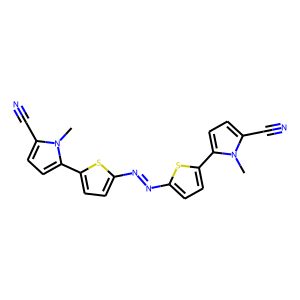

predicted wavelength:  505.38760985854753  , variance:  0.296651590159164




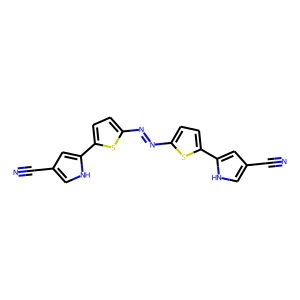

predicted wavelength:  494.3568660661983  , variance:  0.3056642054837285




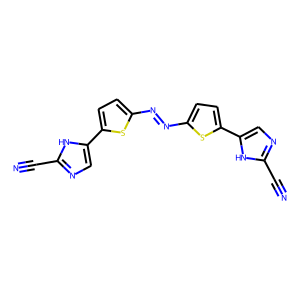

predicted wavelength:  492.1631964897849  , variance:  0.3223074976618907




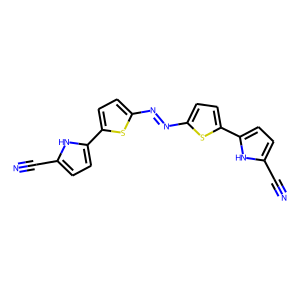

predicted wavelength:  491.6491810574721  , variance:  0.3095612787237261




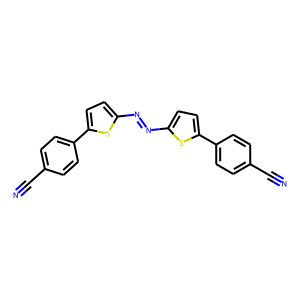

predicted wavelength:  490.58671242307514  , variance:  0.24154809285320755




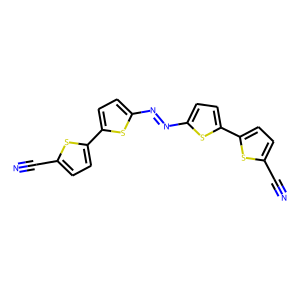

predicted wavelength:  487.6077325725759  , variance:  0.31517880126017644




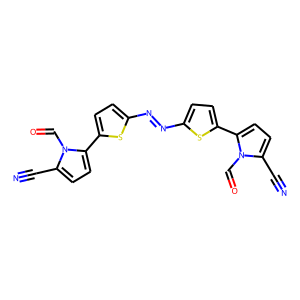

predicted wavelength:  486.8251691907916  , variance:  0.2791463948595237




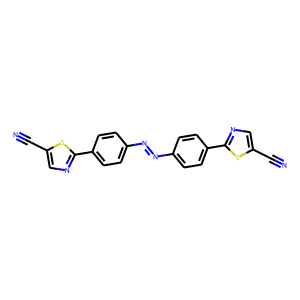

predicted wavelength:  484.6973807399112  , variance:  0.2598820107113635




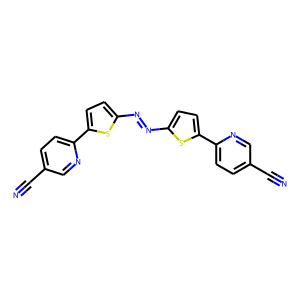

predicted wavelength:  484.3761048869161  , variance:  0.2645637957903465




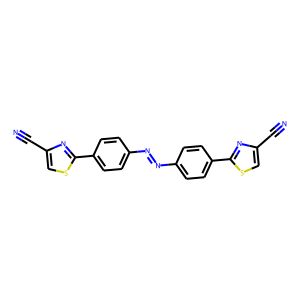

predicted wavelength:  483.6711235173088  , variance:  0.25858176909953784




In [54]:
top_smiles = top_molecules['SMILES']
means = top_molecules['mean']
vars = top_molecules['var']

for (smiles, mean, var) in zip(top_smiles, means, vars):
  image = Draw.MolToImage(Chem.MolFromSmiles(smiles))
  display(image)
  print('predicted wavelength: ', mean, ' , variance: ', var)
  print('\n')

In [56]:
for smiles in top_smiles:
  print(smiles)

Cn1c(C#N)ccc1-c1ccc(N=Nc2ccc(-c3ccc(C#N)n3C)s2)s1
N#Cc1c[nH]c(-c2ccc(N=Nc3ccc(-c4cc(C#N)c[nH]4)s3)s2)c1
N#Cc1ncc(-c2ccc(N=Nc3ccc(-c4cnc(C#N)[nH]4)s3)s2)[nH]1
N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)[nH]4)s3)s2)[nH]1
N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)cc4)s3)s2)cc1
N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)s4)s3)s2)s1
N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)n4C=O)s3)s2)n1C=O
N#Cc1cnc(-c2ccc(N=Nc3ccc(-c4ncc(C#N)s4)cc3)cc2)s1
N#Cc1ccc(-c2ccc(N=Nc3ccc(-c4ccc(C#N)cn4)s3)s2)nc1
N#Cc1csc(-c2ccc(N=Nc3ccc(-c4nc(C#N)cs4)cc3)cc2)n1
